In [26]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline
dataset_rest = Table.read_table('restaurant_inspection_scores.csv').drop('Facility ID','Process Description')
dataset_rest

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


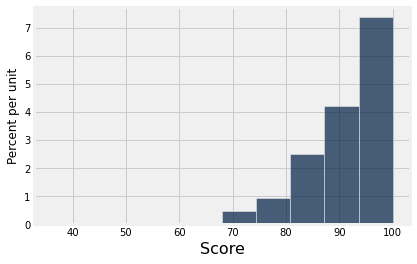

In [27]:
dataset_rest.hist('Score')

In [23]:
dataset_mean = np.mean(dataset_rest.column('Score'))
dataset_mean

91.40706693478886

In [29]:
restaurants_sample = dataset_rest.sample(100, with_replacement=False)
restaurants_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Cisco's Bakery & Coffee Shop,78702,09/11/2015,82,"1511 E 6TH ST AUSTIN, TX 78702 (30.263118, -97.726742)"
7-Eleven - Vaishnavi Food and Gas,78704,08/14/2015,93,"2820 S LAMAR BLVD AUSTIN, TX 78704 (30.243623, -97.782285)"
Taco Bell,78757,12/08/2015,90,"7793 BURNET RD AUSTIN, TX 78757 (30.354586, -97.731747)"
P. Terry's Burger Stand,78758,02/13/2015,92,"12301 N MOPAC EXPY SVRD NB AUSTIN, TX 78758 (30.414916, ..."
Foxy's Cabaret,78728,11/02/2015,84,"16328 N IH 35 SVRD SB AUSTIN, TX 78728 (30.465101, -97.6 ..."
C-Mart #10,78748,02/12/2016,94,"3008 W SLAUGHTER LN AUSTIN, TX 78748 (30.179033, -97.840417)"
KFC X743716,78745,11/05/2013,97,"801 E WILLIAM CANNON DR AUSTIN, TX 78745 (30.191158, -97 ..."
Golden Chick,78758,07/31/2014,100,"9600 N LAMAR BLVD AUSTIN, TX 78758 (30.365513, -97.695635)"
Super 8 Motel,78753,02/25/2016,85,"8128 N IH 35 SVRD SB AUSTIN, TX 78753 (30.343999, -97.69 ..."
Longhorn Village - Skilled Nursing,78732,10/02/2015,85,"12001 LONGHORN PKWY AUSTIN, TX 78732 (30.350762, -97.91176)"


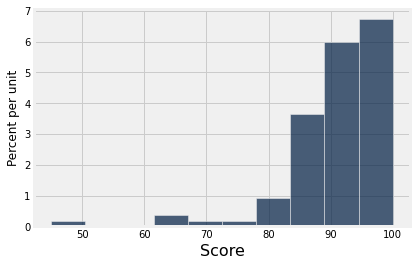

In [30]:
restaurants_sample.hist('Score')

In [31]:
sampleres_mean = np.mean(restaurants_sample.column('Score'))
sampleres_mean

91.22

In [35]:
#Question 1

def func_one_resampled_mean(data):
    resampled_data = data.sample()
    return np.mean(resampled_data.column('Score'))
this_mean = func_one_resampled_mean(dataset_rest)
this_mean

91.30533098042434

In [41]:
#Question 2

def bootstrap_scores():
  resampled_means = np.array([])
  for i in range(5000):
    resampled_mean =func_one_resampled_mean(restaurants_sample)
    resampled_means = np.append(resampled_mean, resampled_means)
  return resampled_means
resampled_means = bootstrap_scores()
resampled_means


array([91.24, 90.85, 91.82, ..., 91.46, 91.87, 90.74])

In [45]:
np.mean(resampled_means)

91.21568799999999

In [46]:
np.std(resampled_means)

0.8744471205601858

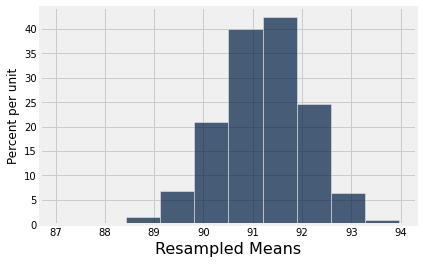

In [48]:
Table().with_column('Resampled Means', resampled_means).hist()

In [49]:
#Question 3
lower_bound = percentile(2.5,resampled_means)
upper_bound = percentile(97.5,resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 89.44 , 92.86 )


In [51]:
#Question 6
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_sd = np.std(restaurant_sample.column('Score'))
sample_size = restaurant_sample.num_rows

sd_of_means = np.std(dataset_rest.column('Score'))/np.sqrt(sample_size)
lower_bound_normal = sample_mean - 2*sd_of_means
upper_bound_normal = sample_mean + 2*sd_of_means
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 90.22618327076104 , 93.29381672923897 )


In [84]:
#Testing the central limit theorem

coin_proportions = make_array(.5, .5)

def one_statistic_prop_heads(n):
  simulated_proportions = sample_proportions(n,coin_proportions)
  prop_heads = simulated_proportions[0]
  return prop_heads

In [85]:
one_statistic_prop_heads(100)

0.58

In [86]:
#Question 2.2
def sample_size_n(n):
    coin_proportions = make_array(.5, .5)
    heads_proportions = make_array()
    for i in np.arange(5000):
        prop_heads = sample_proportions(n,coin_proportions)
        heads_proportions = np.append(prop_heads,heads_proportions)
    return heads_proportions

In [87]:
sample_size_n(100)

array([0.53, 0.47, 0.5 , ..., 0.34, 0.54, 0.46])

In [90]:
# Question 3
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [91]:
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

In [93]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n, with_replacement = True)
        sample_mean = np.mean(sample.column('Delay'))
        sample_means = np.append(sample_mean, sample_means)
    return np.std(sample_means)
empirical_sample_mean_sd(10)

11.92319577797832

In [96]:
#Question 4

def predict_sample_mean_sd(n):
 return np.std(united.column('Delay'))/np.sqrt(n)
predict_sample_mean_sd(10)

12.484735400972708